In [1]:
import sys
sys.path.insert(0, '/home/giulia/Provenance')
import ipynb.fs.full.provenance as pr
import pandas as pd
import numpy as np

from IPython.display import Image

# Specify where to save the processed files as savepath
savepath = 'results/FeatureTransformation_Prov/'

In [2]:
# Files get loaded from fairCorrect github repository
url = 'https://raw.githubusercontent.com/vladoxNCL/fairCorrect/master/Datasets/'
# Get balancing feature to end column
df = pd.read_csv(url + 'adult.data', header=None)

# Assign names to columns
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
         'occupation', 'relationship', 'race', 'sex', 'capital-gain',
         'capital-loss', 'hours-per-week', 'native-country', 'label']

df.columns = names

# Select firt 3 rows and reduce column
df = df[:3]
df = df[['workclass', 'race', 'sex','label']]

# Create a new provenance document 
p = pr.Provenance(df, savepath)


In [3]:
#FEATURE TRANSFORMATION
# Cleanup names from spaces
col = ['workclass', 'sex', 'label']

for c in col:
    df[c] = df[c].map(str.strip)

#GET PROVENANCE
d = p.getProv_FeatureTransformation(df, col)

getProv_FeatureTransformation function took 4.448 ms


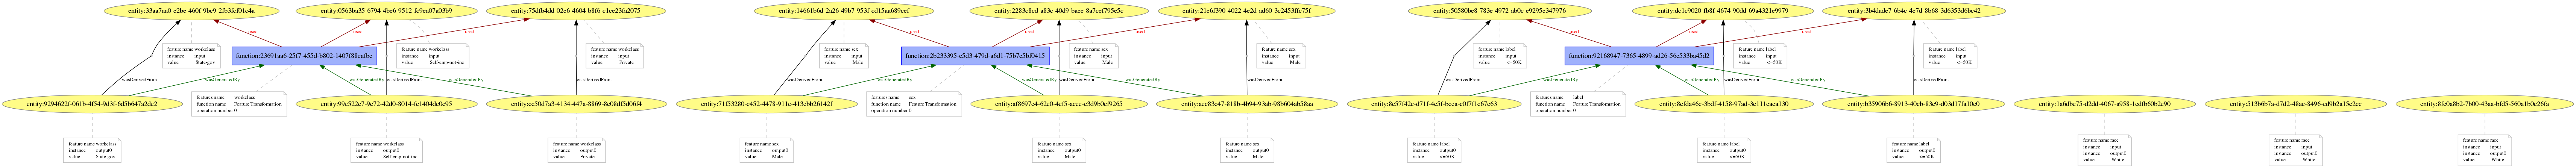

In [4]:
namefile = savepath + 'FeatureTransformation_Prov'
p.save_all_graph(namefile)
Image(namefile + '.png')